# Part B: RE/MAX Price Prediction

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import statsmodels.api as sm

In [27]:
import seaborn as sn
%matplotlib inline
def draw_pp_plot( model, title ):
    probplot = sm.ProbPlot( model.resid, fit = True );
    probplot.ppplot( line='45' ); #45-degree line.

In [28]:
remax = pd.read_csv('REMAX(1).csv') #reading the file and storing it under 'remax'
remax.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [29]:
remax.isnull().sum() #checking to see if any values are null 

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [30]:
remax.info() #seeing the type of information is in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [31]:
remax['mainroad'] = remax['mainroad'].map({'yes': 1, 'no': 0})
remax['guestroom'] = remax['guestroom'].map({'yes': 1, 'no': 0})
remax['basement'] = remax['basement'].map({'yes': 1, 'no': 0})
remax['hotwaterheating'] = remax['hotwaterheating'].map({'yes': 1, 'no': 0})
remax['airconditioning'] = remax['airconditioning'].map({'yes': 1, 'no': 0})
remax['prefarea'] = remax['prefarea'].map({'yes': 1, 'no': 0})
#converting the columns with values 'yes' & 'no' to 1's and 0's

In [32]:
x_features = remax.columns #storing the columns in x_features

In [33]:
x_features = ['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']
#taking out price to not be stored in x_features since it is the dependent variable 

# Encoding Categorical Features

In [34]:
remax_encoded = pd.get_dummies(remax[x_features], columns = ['furnishingstatus'], drop_first = True) #transforming the 'furnishingstatus' column into a dummy variable

In [35]:
remax_encoded.info() #ensuring the type for all columns is int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   area                             545 non-null    int64
 1   bedrooms                         545 non-null    int64
 2   bathrooms                        545 non-null    int64
 3   stories                          545 non-null    int64
 4   mainroad                         545 non-null    int64
 5   guestroom                        545 non-null    int64
 6   basement                         545 non-null    int64
 7   hotwaterheating                  545 non-null    int64
 8   airconditioning                  545 non-null    int64
 9   parking                          545 non-null    int64
 10  prefarea                         545 non-null    int64
 11  furnishingstatus_semi-furnished  545 non-null    uint8
 12  furnishingstatus_unfurnished     545 non-null    u

In [36]:
x_features = remax_encoded.columns #all independent varaibles 
x_features

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [37]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = sm.add_constant(remax_encoded)
Y = remax['price']
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 40 )

# Model building based on training dataset

In [38]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
remax_model_1 = sm.OLS(train_y, train_X).fit()
print(remax_model_1.summary())
#building the first model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     71.45
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           7.21e-98
Time:                        17:30:02   Log-Likelihood:                -6647.6
No. Observations:                 436   AIC:                         1.332e+04
Df Residuals:                     422   BIC:                         1.338e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

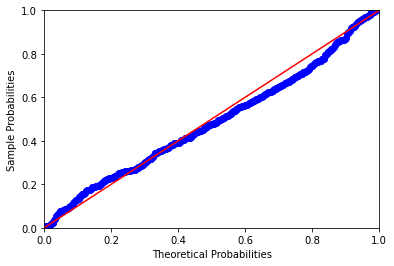

In [39]:
draw_pp_plot(remax_model_1,"Figure - Normal P-P Plot of Regression Standardized Residuals");
#ploting the first model

# Multicollinearity using VIF

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors( X ):
    X_matrix = X.to_numpy()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

In [41]:
vif_factors = get_vif_factors(X[x_features])
vif_factors
#retrieving the VIF value for all columns 

,column,vif
0,area,8.276447
1,bedrooms,16.652387
2,bathrooms,9.417643
3,stories,7.880730
4,mainroad,6.884806
5,guestroom,1.473234
6,basement,2.019858
7,hotwaterheating,1.091568
8,airconditioning,1.767753
9,parking,1.986400


In [42]:
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column
columns_with_large_vif
#determining which columns have the highest VIF value 

0         area
1     bedrooms
2    bathrooms
3      stories
4     mainroad
Name: column, dtype: object

In [43]:
columns_to_be_removed = ['bedrooms', 'bathrooms']
#removing the first two columns with the highest VIF value since we do not want to remove the columns with the highest VIF value at once

In [44]:
x_new_features = list(set(x_features) - set(columns_to_be_removed))
#creating a new x_features that does not include the columns with the highest VIF value (bedrooms & bathrooms)

In [45]:
get_vif_factors(X[x_new_features])

,column,vif
0,prefarea,1.489922
1,airconditioning,1.763784
2,furnishingstatus_semi-furnished,2.182030
3,furnishingstatus_unfurnished,1.818767
4,guestroom,1.468723
5,area,7.116608
6,basement,1.829024
7,parking,1.967207
8,mainroad,6.709752
9,hotwaterheating,1.085384


# New model after removing multicollinearity

In [46]:
train_X = train_X[x_new_features]
remax_model_2 = sm.OLS(train_y, train_X).fit()
print(remax_model_2.summary())
#2nd model without bedrooms and bathrooms as a column in the dataset

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              717.1
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                   1.83e-266
Time:                        17:30:47   Log-Likelihood:                         -6700.8
No. Observations:                 436   AIC:                                  1.342e+04
Df Residuals:                     425   BIC:                                  1.347e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

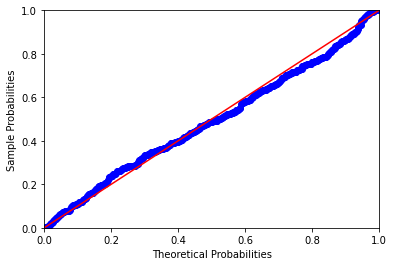

In [47]:
draw_pp_plot(remax_model_2,"Figure - Normal P-P Plot of Regression Standardized Residuals");
#plotting the second model

In [48]:
significant_vars = ['prefarea', 'mainroad', 'furnishingstatus_semi-furnished', 'parking', 'hotwaterheating','airconditioning','basement', 'area', 'guestroom', 'stories']
train_X = train_X[significant_vars]
remax_model_3 = sm.OLS(train_y, train_X).fit()
print(remax_model_3.summary())
#developing a third model without columns furinishingstatus_unfurnished since the p-value was 0.499 which is above 0.05 meaning it was insignificant in the model

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              789.8
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                   7.96e-268
Time:                        17:30:48   Log-Likelihood:                         -6701.1
No. Observations:                 436   AIC:                                  1.342e+04
Df Residuals:                     426   BIC:                                  1.346e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

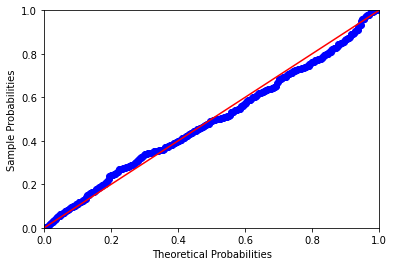

In [49]:
draw_pp_plot(remax_model_3,"Figure - Normal P-P Plot of Regression Standardized Residuals");
#plotting the third model

In [50]:
from scipy.stats import zscore
remax['z_score_price'] = zscore(remax['price'])

In [51]:
remax[ (remax.z_score_price > 3.0) | (remax.z_score_price < -3.0) ]
#retrieving the z-score 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,z_score_price
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,4.566365
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,4.004484
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,4.004484
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,3.985755
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,3.554979
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished,3.255309


In [52]:
train_X_new = train_X.drop( [50,111,127],axis=0)
train_y_new = train_y.drop( [50,111,127],axis=0)

In [53]:
import numpy as np
train_y = np.sqrt( train_y )

In [54]:
remax_model_4 = sm.OLS(train_y, train_X).fit()
print(remax_model_4.summary())
#developing a fourth model based on z-scores

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1215.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                   5.89e-306
Time:                        17:30:51   Log-Likelihood:                         -3231.0
No. Observations:                 436   AIC:                                      6482.
Df Residuals:                     426   BIC:                                      6523.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

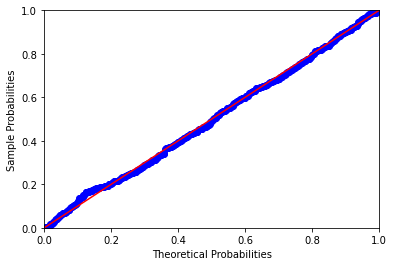

In [55]:
draw_pp_plot(remax_model_4,"Figure - Normal P-P Plot of Regression Standardized Residuals");
#plotting the fourth plot

In [56]:
significant_vars1 = ['mainroad', 'furnishingstatus_semi-furnished', 'hotwaterheating','airconditioning','basement', 'area', 'stories']
train_X = train_X[significant_vars1]
remax_model_5 = sm.OLS(train_y, train_X).fit()
print(remax_model_5.summary())
#developing a fifth model by removing prefarea, parking, and guestroom because each column had a p-value above 0.05 meaning it was insignificant

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1737.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                   3.34e-310
Time:                        17:30:52   Log-Likelihood:                         -3232.3
No. Observations:                 436   AIC:                                      6479.
Df Residuals:                     429   BIC:                                      6507.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

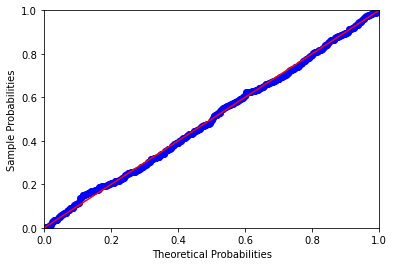

In [57]:
draw_pp_plot(remax_model_5,"Figure - Normal P-P Plot of Regression Standardized Residuals");
#plotting the fifth and final model 

# Prediction on validation set

In [58]:
import numpy as np
pred_y = np.power(remax_model_5.predict( test_X[train_X.columns] ), 2)

# RMSE

In [59]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))
#root mean square error

1778059.45011176

# Measuring R-Squared Value 

In [60]:
np.round( metrics.r2_score(pred_y, test_y), 2 )
#R^2 value

0.44

# RE/MAX Analysis 